In [7]:
import numpy as np
import json
import glob
import os.path as osp
base = "train_results"
jsons = glob.glob(osp.join(base, "*.json"))

In [29]:
data = []
def process_file(f_path):
    with open(f_path, "r") as f:
        info = json.load(f)
        
    e,f = [int(num[1:]) for num in osp.splitext(osp.basename(f_path))[0].split("_")[2:4]]
    info["Macs"] = float(info['Macs'].split(" ")[0])
    params, multiplier = info["params"].split(" ")
    info["params"] = float(params) * (10**3) if multiplier.lower() == 'k' else float(params)*(10**6) 
    return (f,e,info)
for j in jsons:
    data.append(process_file(j))
data = sorted(data, key = lambda x: x[0])
data = [data[i:i+5] for i in range(0,len(data), 5)]
data = [sorted(i, key = lambda x: x[1]) for i in data]
data

6356, 99.3359375],
     [16, 6456, 99.3828125],
     [16, 6556, 99.39322916666667],
     [17, 6747, 99.4375],
     [17, 6847, 99.42578125],
     [17, 6947, 99.359375],
     [18, 7138, 99.6171875],
     [18, 7238, 99.53515625],
     [18, 7338, 99.44010416666667],
     [19, 7529, 99.421875],
     [19, 7629, 99.39453125],
     [19, 7729, 99.31510416666667]],
    'test_acc': [[0, 391, 75.91],
     [1, 782, 76.69],
     [2, 1173, 76.28],
     [3, 1564, 76.23],
     [4, 1955, 76.26],
     [5, 2346, 77.0],
     [6, 2737, 76.57],
     [7, 3128, 76.72],
     [8, 3519, 76.56],
     [9, 3910, 77.23],
     [10, 4301, 76.76],
     [11, 4692, 76.62],
     [12, 5083, 76.96],
     [13, 5474, 77.24],
     [14, 5865, 77.13],
     [15, 6256, 77.31],
     [16, 6647, 76.77],
     [17, 7038, 77.39],
     [18, 7429, 77.09],
     [19, 7820, 76.79]],
    'time': 677.3015804290771})],
 [(25,
   0,
   {'Macs': 0.03,
    'params': 1820000.0,
    'train_acc': [],
    'test_acc': [[0, 0, 9.33]],
    'time': 0}),
  

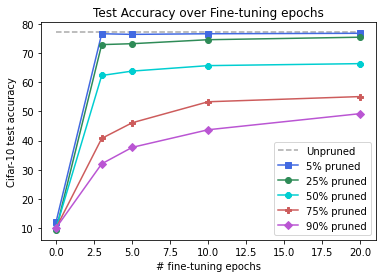

In [41]:
import matplotlib.pyplot as plt
## test_acc over epochs trained
markers = ("s", "o", "8", "P","D")
colors = ('royalblue', 'seagreen', 'darkturquoise', 'indianred', 'mediumorchid')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Test Accuracy over Fine-tuning epochs')
ax.set_ylabel('Cifar-10 test accuracy')
ax.set_xlabel('# fine-tuning epochs')
ax.plot(list(range(0,21,5)), [77.15]*5, color='darkgrey', ls='--', label="Unpruned")
for i in range(5):
    m = markers[i]
    c = colors[i]
    label = f'{data[i][0][0]}% pruned'
    x = [j[1] for j in data[i]]
    y = [j[2]['test_acc'][-1][2] for j in data[i]]
    ax.plot(x, y, color=c, marker=m, label=label)
ax.legend()
fig.savefig('test_acc_epoch.png')

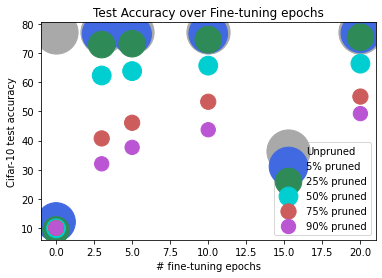

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Test Accuracy over Fine-tuning epochs')
ax.set_ylabel('Cifar-10 test accuracy')
ax.set_xlabel('# fine-tuning epochs')
s = 200*2**(3.22)
x = [0,3,5,10,20]
ax.scatter( x , [77.15]*5, s=s, color='darkgrey', marker='o', label='Unpruned')
for i in range(5):
    m = 'o'
    c = colors[i]
    label = f'{data[i][0][0]}% pruned'
    x = [j[1] for j in data[i]]
    y = [j[2]['test_acc'][-1][2] for j in data[i]]
    s = [200*2**(j[2]['params']/1e6) for j in data[i]]
    ax.scatter(x, y, color=c, marker=m, s=s, label=label)
ax.legend()
fig.savefig('test_acc_params.png')
base_macs = 47177738.0
macs = [42521674.0, 27125770.0, 12578826.0, 3536906.0, 722890.0 ]

0.0425, 2.9000
[12.06, 76.63, 76.42, 76.63, 76.79]
0.0271, 1.8200
[9.33, 72.91, 73.22, 74.59, 75.45]
0.0126, 0.8237
[9.86, 62.31, 63.82, 65.7, 66.38]
0.0035, 0.2156
[10.0, 40.72, 46.09, 53.3, 55.08]
0.0007, 0.0387
[10.0, 32.01, 37.65, 43.7, 49.23]


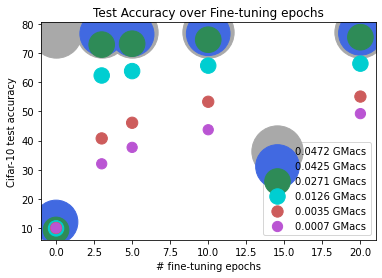

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Test Accuracy over Fine-tuning epochs')
ax.set_ylabel('Cifar-10 test accuracy')
ax.set_xlabel('# fine-tuning epochs')
s_f = lambda x: 100*2**(x/1e7)
s = s_f(base_macs)
x = [0,3,5,10,20]
ax.scatter( x , [77.15]*5, s=s, color='darkgrey', marker='o', label=f'{base_macs/1e9:.4f} GMacs')
for i in range(5):
    m = 'o'
    c = colors[i]
    label = f'{data[i][0][0]}% pruned'
    x = [j[1] for j in data[i]]
    y = [j[2]['test_acc'][-1][2] for j in data[i]]
    s = [s_f(macs[i])]*5
    parms = data[i][0][2]["params"]/1e6
    print(f'{macs[i]/1e9:.4f}, {parms:.4f}')
    print(y)
    ax.scatter(x, y, color=c, marker=m, s=s, label=f'{macs[i]/1e9:.4f} GMacs')
ax.legend()
fig.savefig('test_acc_Macs.png')
